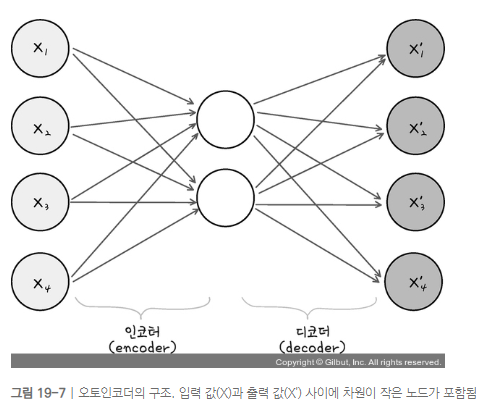

GAN이 세상에 존재하지 않는 완전한 가상의 것을 만들어 내는 반면 \
오토인코더는 입력 데이터의 특징을 효율적으로 담아낸 이미지를 만들어 낸다

예를 들어 \
GAN으로 사람의 얼굴을 만들면 진짜 같아 보여도 실제로는 존재하지 않는 완전한 가상 이미지가 만들어진다 \
하지만 오토인코더로 사람의 얼굴을 만들 경우 초점이 좀 흐릿하고 윤곽이 불명확하지만 사람의 특징을 유추할 수 있는 것들이 모여 이미지가 만들어진다

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras import models,layers

import numpy as np
import matplotlib.pyplot as plt
import os

os.environ['KMP_DUPLICATE_LIB_OK']="TRUE"

In [2]:
# MNIST 데이터셋을 불러옴
(X_train, _), (X_test, _) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype(float) / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype(float) / 255

In [4]:
# 생성자 모델 만들기
autoencoder = models.Sequential()

# 인코딩 부분
autoencoder.add(layers.Conv2D(16, kernel_size=3, padding='same', input_shape=(28, 
28,1), activation='relu'))
autoencoder.add(layers.MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(layers.Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(layers.MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(layers.Conv2D(8, kernel_size=3, padding='same', activation='relu', 
                             strides=2))

# 디코딩 부분
autoencoder.add(layers.Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(layers.UpSampling2D())
autoencoder.add(layers.Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(layers.UpSampling2D())
autoencoder.add(layers.Conv2D(16, kernel_size=3, activation='relu'))
autoencoder.add(layers.UpSampling2D())
autoencoder.add(layers.Conv2D(1, kernel_size=3, padding='same', 
                              activation='sigmoid'))

# 전체 구조 확인
autoencoder.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 4, 4, 8)           584       
                                                                 
 conv2d_10 (Conv2D)          (None, 4, 4, 8)          

Shape이 줄었다가 최종적으로는 처음과 같이 변함

In [5]:
# 컴파일 및 학습을 하는 부분
# 정확도 측정이 아니기 때문에 metrics값은 안줌
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

# 처음 X_train을 넣어서 변한 값 X_train을 결과로 다시 넣어줌
autoencoder.fit(X_train, X_train, epochs=50, batch_size=128, 
                validation_data=(X_test, X_test))

Epoch 1/50
469/469 [==============================] - 104s 219ms/step - loss: 0.2018 - val_loss: 0.1331
Epoch 2/50
469/469 [==============================] - 102s 218ms/step - loss: 0.1237 - val_loss: 0.1144
Epoch 3/50
469/469 [==============================] - 96s 205ms/step - loss: 0.1110 - val_loss: 0.1060
Epoch 4/50
469/469 [==============================] - 95s 202ms/step - loss: 0.1047 - val_loss: 0.1012
Epoch 5/50
469/469 [==============================] - 97s 207ms/step - loss: 0.1009 - val_loss: 0.0985
Epoch 6/50
469/469 [==============================] - 107s 228ms/step - loss: 0.0983 - val_loss: 0.0960
Epoch 7/50
469/469 [==============================] - 107s 228ms/step - loss: 0.0963 - val_loss: 0.0953
Epoch 8/50
469/469 [==============================] - 106s 225ms/step - loss: 0.0948 - val_loss: 0.0935
Epoch 9/50
469/469 [==============================] - 105s 224ms/step - loss: 0.0936 - val_loss: 0.0919
Epoch 10/50
469/469 [==============================] - 105s 223ms/s

313/313 [==============================] - 1s 3ms/step


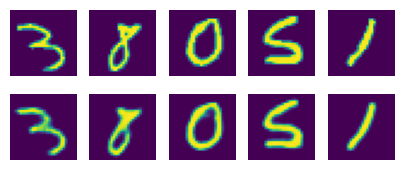

In [6]:
# 테스트할 이미지를 랜덤하게 불러옴
random_test = np.random.randint(X_test.shape[0], size=5)

# 앞서 만든 오토인코더 모델에 집어넣음
ae_imgs = autoencoder.predict(X_test)

# 출력될 이미지의 크기를 정함
plt.figure(figsize=(7, 2))

# 랜덤하게 뽑은 이미지를 차례로 나열
for i, image_idx in enumerate(random_test): 
   ax = plt.subplot(2, 7, i + 1) 
   # 테스트할 이미지를 먼저 그대로 보여줌
   plt.imshow(X_test[image_idx].reshape(28, 28))
   ax.axis('off')
   ax = plt.subplot(2, 7, 7 + i +1)
   # 오토인코딩 결과를 다음열에 출력
   plt.imshow(ae_imgs[image_idx].reshape(28, 28))
   ax.axis('off')
plt.show()